This notebook aims to explore the performance effects on changing the K value aka the
number of neighbours. Two difference similarity measures will be compared "Pearson" and "Cosine"
and for simplicity, only time and rmse will be measured during this experiment

In [1]:
from surprise import Dataset, KNNBasic
import random, numpy as np, pandas as pd
from own_algorithms.helper import testing_algorithm
import matplotlib.pyplot as plt


In [2]:
# load data and split into A/B sets, A for CFV and B for unbiased testing

data = Dataset.load_builtin('ml-100k')
raw_ratings= data.raw_ratings

random.seed(2001)
np.random.seed(2001)
random.shuffle(raw_ratings)

# create threshold for unseen, 80-20
cutoff = int(0.8 * len(raw_ratings))
A_raw= raw_ratings[:cutoff]
B_raw= raw_ratings[cutoff:]

# data is now only set A ratings
data.raw_ratings= A_raw

In [3]:
#Code to collate data on rmse for user based KNN on both Pearson and Cosine measures

pearson_df= pd.DataFrame(columns=['K', 'RMSE', 'Fit Time'])
cosine_df= pd.DataFrame(columns=['K', 'RMSE', 'Fit Time'])

for i in range(20, 101, 5):
    pearson_algo = KNNBasic(k=i, sim_options={'name':'Pearson', 'user_based': True}, verbose=False)
    cosine_algo = KNNBasic(k=i, sim_options={'name':'Cosine', 'user_based': True}, verbose=False)
    p_scores= testing_algorithm(pearson_algo, data)
    c_scores= testing_algorithm(cosine_algo, data)
    p_row= np.array([i, p_scores[0], p_scores[3]])
    c_row= np.array([i, c_scores[0], c_scores[3]])

    pearson_df.loc[len(pearson_df)] = p_row
    cosine_df.loc[len(cosine_df)]= c_row


In [4]:
pearson_df.insert(0, 'Similarity', 'Pearson')
cosine_df.insert(0, 'Similarity', 'Cosine')

In [5]:
UserBased= pd.concat([pearson_df, cosine_df], ignore_index=True)
UserBased.to_csv('./algo_data/KNNBasicUser_Pearson_Cosine_K_values.csv', index=False)

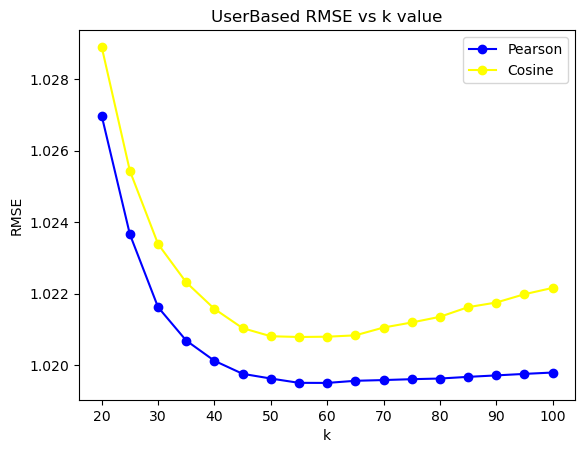

In [6]:

fig, ax = plt.subplots()

# Plot 'rmse' against 'k' for both dataframes on the same axis
pearson_df.plot(x='K', y='RMSE', kind='line', ax=ax, label='Pearson', color='blue', marker='o')
cosine_df.plot(x='K', y='RMSE', kind='line', ax=ax, label='Cosine', color= 'yellow', marker='o')

plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('UserBased RMSE vs k value')

plt.savefig('./KNN Graphs/UserBased_K_testing.png')
plt.show()



In [7]:
#Code to collate data on rmse for item based KNN on both Pearson and Cosine measures

pearson_df= pd.DataFrame(columns=['K', 'RMSE', 'Fit Time'])
cosine_df= pd.DataFrame(columns=['K', 'RMSE', 'Fit Time'])

for i in range(20, 101, 5):
    pearson_algo = KNNBasic(k=i, sim_options={'name':'Pearson', 'user_based': False}, verbose=False)
    cosine_algo = KNNBasic(k=i, sim_options={'name':'Cosine', 'user_based': False}, verbose=False)
    p_scores= testing_algorithm(pearson_algo, data)
    c_scores= testing_algorithm(cosine_algo, data)
    p_row= np.array([i, p_scores[0], p_scores[3]])
    c_row= np.array([i, c_scores[0], c_scores[3]])

    pearson_df.loc[len(pearson_df)] = p_row
    cosine_df.loc[len(cosine_df)]= c_row

In [8]:
pearson_df.insert(0, 'Similarity', 'Pearson')
cosine_df.insert(0, 'Similarity', 'Cosine')
UserBased= pd.concat([pearson_df, cosine_df], ignore_index=True)
UserBased.to_csv('./algo_data/KNNBasicItem_Pearson_Cosine_K_values.csv', index=False)


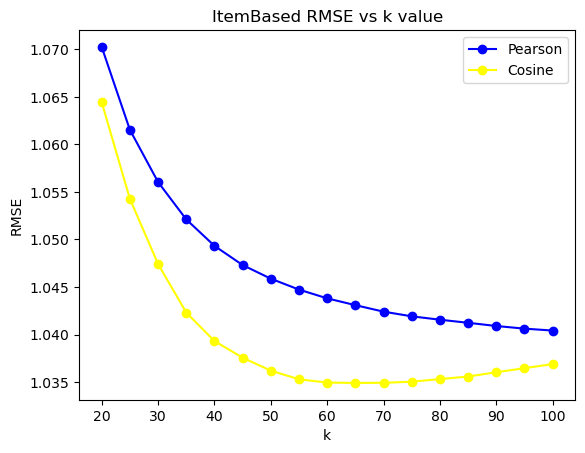

In [9]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot 'rmse' against 'k' for both dataframes on the same axis
pearson_df.plot(x='K', y='RMSE', kind='line', ax=ax, label='Pearson', color='blue', marker='o')
cosine_df.plot(x='K', y='RMSE', kind='line', ax=ax, label='Cosine', color= 'yellow', marker='o')

# Set the axis labels and title
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('ItemBased RMSE vs k value')

# Show the plot
plt.savefig('./KNN Graphs/ItemBased_K_testing.png')
plt.show()


The results show that item based works better with cosine similarity ann user based works better with Pearson